In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from utility.helper import  print_helloworld

print_helloworld()

hello worldddd


In [9]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

2021-08-26 11:17:33,149 | INFO | succeed
2021-08-26 11:17:33,149 | INFO | succeed


In [23]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

(60000, 10)

In [24]:
inputs = tf.keras.Input(shape=(28*28))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop', 
           loss='categorical_crossentropy',
           metrics=['accuracy'])

model.fit(  x_train, 
            y_train, 
            epochs=5, 
            batch_size=128)

2021-08-25 20:08:23.085297: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4304 - accuracy: 0.8736
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1128 - accuracy: 0.9666
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0716 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0504 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0376 - accuracy: 0.9885


In [27]:
# Evaluation

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0679 - accuracy: 0.9800


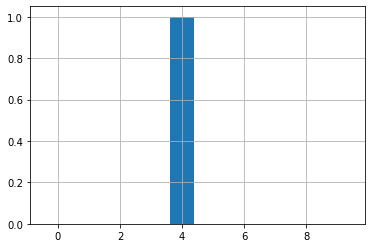

In [28]:
y_pred = model.predict(x_test)

plt.bar(list(range(len(y_pred[56]))), y_pred[56])
plt.grid()
plt.show()

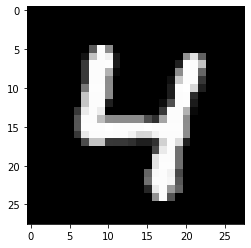

In [12]:
plt.imshow(x_test[56].reshape(28, 28), cmap='gray')
plt.show()